## 머신러닝
### 1번 군집분석
#### 다음은 온라인 유통회사 A사의 고객의 물품 구매 정보에 대한 데이터이다. A 회사는 RMF(Recency, Monetary, Frequency) 중에서 F와 M를 기준으로 고객 군집 분석을 시행하고자 한다. 다음 물음에 답하시오.

데이터 설명
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [238]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url1 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem1.csv'
encoded_url1 = urllib.parse.quote(url1, safe=':/')

response = urllib.request.urlopen(encoded_url1, context=context)
df1 = pd.read_csv(response, encoding='utf-8')
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany
...,...,...,...,...,...,...,...,...
41019,560590,21884,CAKES AND BOWS GIFT TAPE,12,7/19/2011 15:55,0.65,12560.0,Germany
41020,561870,21156,RETROSPOT CHILDRENS APRON,8,7/31/2011 11:45,1.95,14911.0,EIRE
41021,579792,22436,12 COLOURED PARTY BALLOONS,20,11/30/2011 15:43,0.65,12714.0,France
41022,C566753,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,9/14/2011 15:48,9.95,14911.0,EIRE


[reference](https://medium.com/@ugursavci/customer-segmentation-using-rfm-analysis-in-python-218a3255f714)

In [239]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    41024 non-null  object 
 1   StockCode    41024 non-null  object 
 2   Description  41024 non-null  object 
 3   Quantity     41024 non-null  int64  
 4   InvoiceDate  41024 non-null  object 
 5   UnitPrice    41024 non-null  float64
 6   CustomerID   41024 non-null  float64
 7   Country      41024 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ MB


In [248]:
df1["CustomerID"] = df1.CustomerID.astype(int)

In [253]:
df1["InvoiceDate"] = pd.to_datetime(df1.InvoiceDate)

In [254]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    41024 non-null  object        
 1   StockCode    41024 non-null  object        
 2   Description  41024 non-null  object        
 3   Quantity     41024 non-null  int64         
 4   InvoiceDate  41024 non-null  datetime64[ns]
 5   UnitPrice    41024 non-null  float64       
 6   CustomerID   41024 non-null  int32         
 7   Country      41024 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 2.3+ MB


#### 1.1 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성하시오.

In [250]:
df1.CustomerID.nunique()

348

In [255]:
df1['Total_Price'] = df1['UnitPrice']*df1['Quantity']

In [261]:
import datetime as dt
print(df1['InvoiceDate'].min())
print(df1['InvoiceDate'].max())
now = dt.datetime(2011,12,10)
print(now)

2010-12-01 08:45:00
2011-12-09 12:50:00
2011-12-10 00:00:00


In [268]:
rfm = df1.groupby('CustomerID').agg({'InvoiceDate': lambda day : (now - day.max()).days,
                                     'InvoiceNo' : lambda num : len(num),
                                     'Total_Price' : lambda price: price.sum()
                                    })

In [269]:
rfm

,InvoiceDate,InvoiceNo,Total_Price
CustomerID,,,
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40
12352,36,95,1545.41
12354,232,58,1079.40
...,...,...,...
14935,297,10,1784.71
14936,9,366,8117.42
14937,56,35,1617.63


In [283]:
print(df1[df1["CustomerID"] == 12348]["InvoiceDate"].min())
print(df1[df1["CustomerID"] == 12348]["InvoiceDate"].max())

2010-12-16 19:09:00
2011-09-25 13:13:00


In [274]:
df1[df1["CustomerID"] == 12348]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
3757,548955,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-04-05 10:47:00,0.85,12348,Finland,17.00
4504,539318,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-16 19:09:00,0.55,12348,Finland,13.20
4871,548955,23078,ICE CREAM PEN LIP GLOSS,96,2011-04-05 10:47:00,1.25,12348,Finland,120.00
10933,539318,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-16 19:09:00,0.55,12348,Finland,13.20
12556,539318,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2010-12-16 19:09:00,0.55,12348,Finland,13.20
13246,568172,23078,ICE CREAM PEN LIP GLOSS,96,2011-09-25 13:13:00,1.25,12348,Finland,120.00
14075,541998,21726,MULTI HEARTS STICKERS,24,2011-01-25 10:42:00,0.85,12348,Finland,20.40
15709,541998,21967,PACK OF 12 SKULL TISSUES,144,2011-01-25 10:42:00,0.29,12348,Finland,41.76
15716,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,12348,Finland,39.60
16559,539318,21211,SET OF 72 SKULL PAPER DOILIES,72,2010-12-16 19:09:00,1.45,12348,Finland,104.40


In [273]:
len(df1[df1["CustomerID"] == 12348])

31

#### 1.2 새로 생성된 데이터를 기준으로 EDA를 진행하고 이상치를 제거하고, 필요하다면 다른 전처리를 수행하시오.

In [284]:
rfm.describe()

,InvoiceDate,InvoiceNo,Total_Price
count,348.000000,348.000000,348.000000
mean,88.454023,117.885057,3960.727356
std,105.741709,354.247025,18821.144519
min,0.000000,1.000000,-1126.000000
25%,15.000000,23.000000,452.000000
50%,39.000000,51.500000,1008.990000
75%,116.750000,113.250000,2760.185000
max,373.000000,5903.000000,279489.020000


In [285]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 12348 to 17097
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceDate  348 non-null    int64  
 1   InvoiceNo    348 non-null    int64  
 2   Total_Price  348 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 10.9 KB


In [287]:
df1.CustomerID.nunique()

348

In [288]:
col_list = ['Recency', 'Frequency', 'Monetary']
rfm.columns = col_list

In [289]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40
12352,36,95,1545.41
12354,232,58,1079.40
...,...,...,...
14935,297,10,1784.71
14936,9,366,8117.42
14937,56,35,1617.63


In [302]:
rfm["R"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4, 3, 2, 1])
rfm["F"] = pd.qcut(rfm["Frequency"], 5, labels = [1, 2, 3, 4, 5])
rfm["M"] = pd.qcut(rfm["Monetary"], 5, labels = [1, 2, 3, 4, 5])
rfm["RFM_Score"] =  rfm["R"].astype(str) +rfm["F"].astype(str) + rfm["M"].astype(str)

In [303]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12348,75,31,1797.24,2,2,4,224
12349,18,73,1757.55,4,4,4,444
12350,310,17,334.40,1,1,1,111
12352,36,95,1545.41,3,4,4,344
12354,232,58,1079.40,1,3,3,133
...,...,...,...,...,...,...,...
14935,297,10,1784.71,1,1,4,114
14936,9,366,8117.42,5,5,5,555
14937,56,35,1617.63,3,2,4,324


In [314]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [316]:
rfm['Segment'] = rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
CustomerID,,,,,,,,
12348,75,31,1797.24,2,2,4,224,At Risk
12349,18,73,1757.55,4,4,4,444,Loyal Customers
12350,310,17,334.40,1,1,1,111,Hibernating
12352,36,95,1545.41,3,4,4,344,Loyal Customers
12354,232,58,1079.40,1,3,3,133,Need Attention


#### 1.3 적합한 군집분석 알고리즘을 선택하고 시행한 후, 시행 결과에 대해 응집도와 분리도 관점에서 평가하시오.

In [318]:
rfm_cluster = rfm[['R','M','F']]

In [339]:
import sklearn
from sklearn import *
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, OPTICS
from scipy.cluster.hierarchy import linkage, dendrogram


In [340]:
clusters = linkage(rfm_cluster, method='complete', metric='euclidean')
clusters.shape

(347, 4)

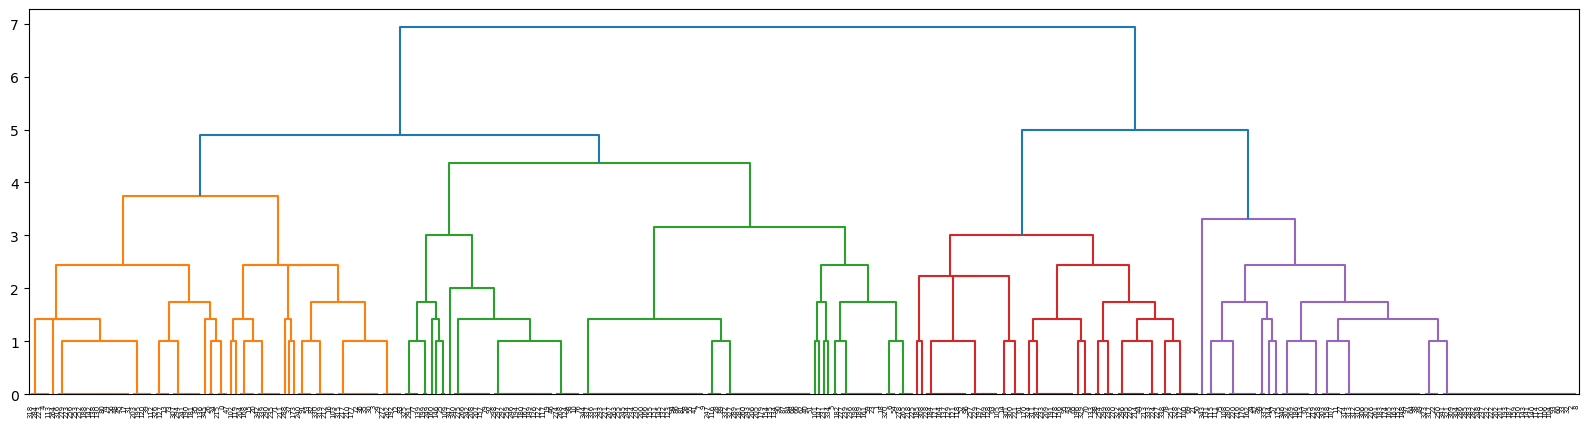

In [345]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
dendrogram(clusters,) #leaf_rotation=90, leaf_font_size=12,)
plt.show()

In [348]:
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

cut_tree = fcluster(clusters, t=4, criterion='distance')
cut_tree # prediction

rfm['labels'] = cut_tree# 정답
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,labels
CustomerID,,,,,,,,,
12348,75,31,1797.24,2,2,4,224,At Risk,1
12349,18,73,1757.55,4,4,4,444,Loyal Customers,3
12350,310,17,334.40,1,1,1,111,Hibernating,5
12352,36,95,1545.41,3,4,4,344,Loyal Customers,1
12354,232,58,1079.40,1,3,3,133,Need Attention,1
...,...,...,...,...,...,...,...,...,...
14935,297,10,1784.71,1,1,4,114,At Risk,5
14936,9,366,8117.42,5,5,5,555,Champions,3
14937,56,35,1617.63,3,2,4,324,At Risk,1


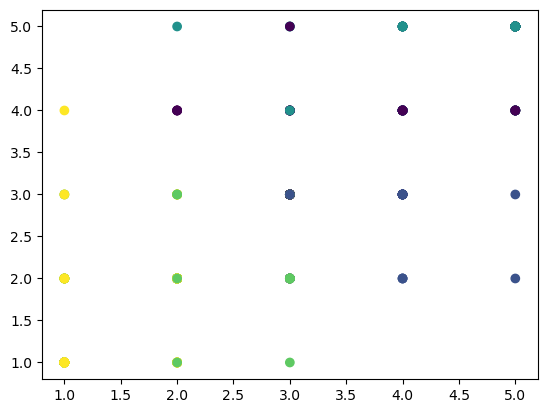

In [349]:
plt.scatter(x=rfm['F'], y=rfm['M'], c=rfm['labels'])

In [351]:
rfm_Kcluster = rfm_cluster[["R","F","M"]]

In [353]:
model = KMeans(n_clusters=4, random_state=0, algorithm='auto')

In [354]:
model.fit(rfm_Kcluster)

C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=4, random_state=0)

In [357]:
pred = model.predict(rfm_Kcluster)
pred
len(pred)

348

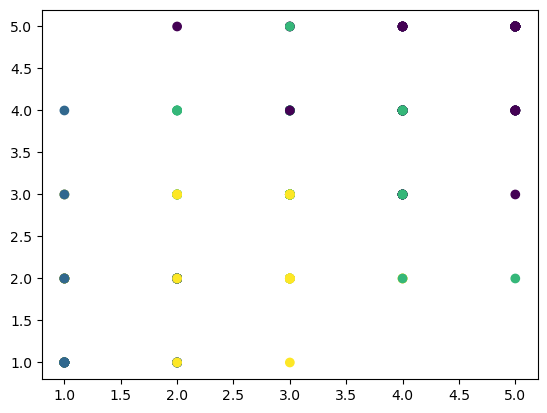

In [358]:
plt.scatter(x=rfm['F'], y=rfm['M'], c=pred)

#### 1.4 각 군집별 특성에 대한 의견과 비즈니스적 인사이트를 제시하시오

### 2번 시계열분석

#### 데이터 설명
- 각 raw는 관광지 A의 1990년 1월 부터 25년동안의 매달 평균 이용객 숫자이다.

In [163]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url2 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem2.csv'
encoded_url2 = urllib.parse.quote(url2, safe=':/')

response2 = urllib.request.urlopen(encoded_url2, context=context)
df2 = pd.read_csv(response2, encoding='utf-8', index_col=0)
df2

,counts
0,544.3
1,603.1
2,NaN
3,533.4
4,619.5
...,...
295,445.2
296,472.0
297,341.6
298,477.8


정상성
 - 시계열분석 위해서는 정상성 만족해야함 (시점에 상관없이 시계열 특징이 일치)
 - 평균 일정 | 분산이 시점에 의존하지 않음 | 공분산은 시차에만 의존하고 시점에 의존하지 않음
   
정상성 확인
 - 시계열 그래프
 - 통계적 가설 검정 (ADF 및 KPSS)
 - 자기상관 (ACF 및 PACF)

비정상 시계열
 - 정상성 조건을 하나라도 만족하지 못한 경우이며 대부분의 시계열 자료는 비정상임
 - 비정상 시계열 자료는 데이터를 정상성 시계열 자료로 만든 후 시계열 분석 수행


변환
 - 추세를 보이는 (평균이 일정하지 않음) 차분
 - 시간에 따라 분산이 일정하지 않은 경우 변환
 - 차분: 현재 시점에서 바로 전 시점 자료를 빼는 경우
 - 계절차분: 여러 시점 전의 자료를 빼는 것
[]()reference

#### 2-1 EDA와 시각화를 진행하라

<AxesSubplot: >

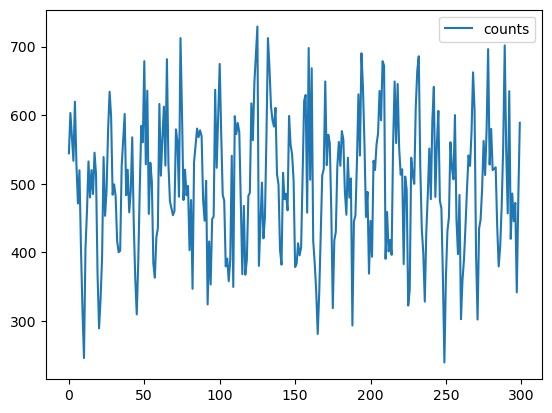

In [167]:
#df2.plot()
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(df2)

#### 2-2 결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라

In [188]:
df2.isna().value_counts()

counts
False     295
True        5
dtype: int64

In [196]:
df2[df2['counts'].isnull()]

,counts
2,NaN
68,NaN
84,NaN
167,NaN
282,NaN


In [191]:
df_ip = df2.interpolate(option='time')
#df_ff = df2.ffill()
#df_bf = df2.bfill()

<AxesSubplot: >

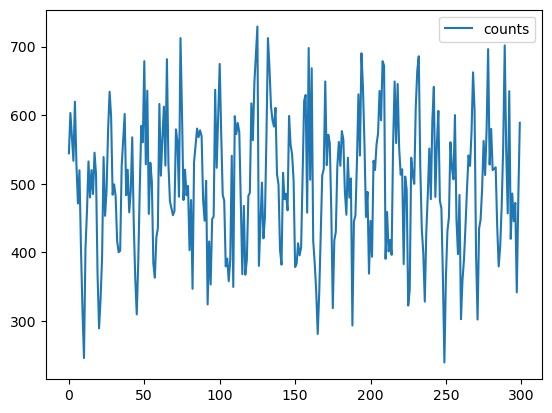

In [203]:
sns.lineplot(df_ip)

#### 2-3 계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가 할 것

In [220]:
rolling_mean = df_ip.rolling(30).mean()
rolling_std = df_ip.rolling(30).std()

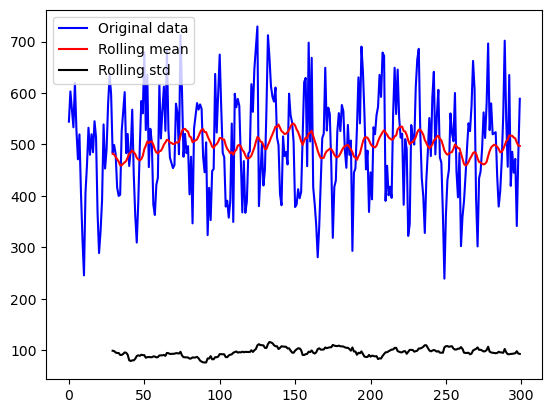

In [221]:
plt.plot(df_ip, color="blue", label='Original data')
plt.plot(rolling_mean, color="red", label='Rolling mean')
plt.plot(rolling_std, color='black', label='Rolling std')
plt.legend(loc="best")

In [228]:
import statsmodels.tsa.api as tsa
model_series = tsa.seasonal_decompose(df_ip, model='multiplicative', period=12)

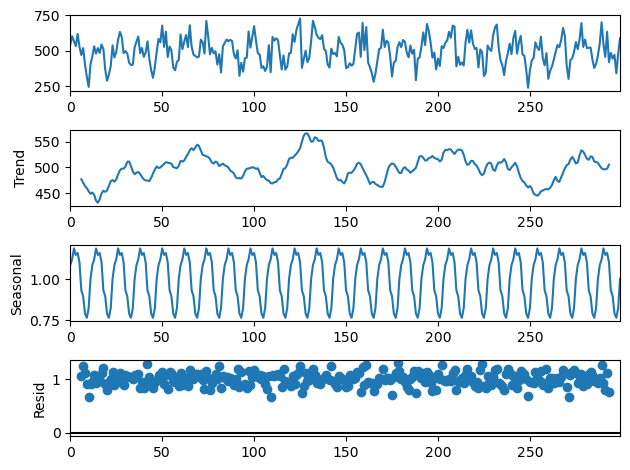

In [230]:
model_series.plot();

In [231]:
import statsmodels.tsa.api as tsa
model_series = tsa.seasonal_decompose(df_ip, model='additive', period=12)

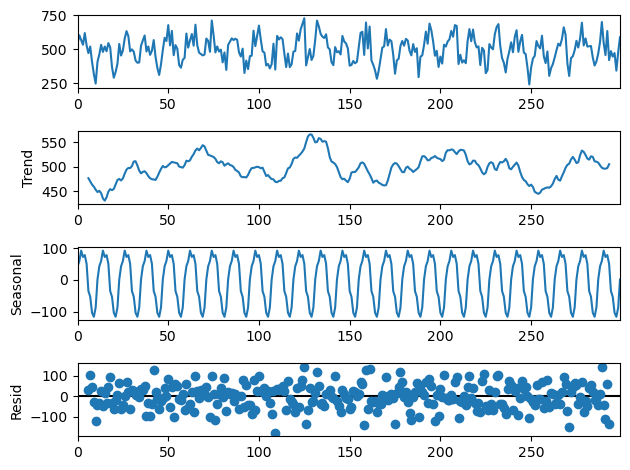

In [232]:
model_series.plot();

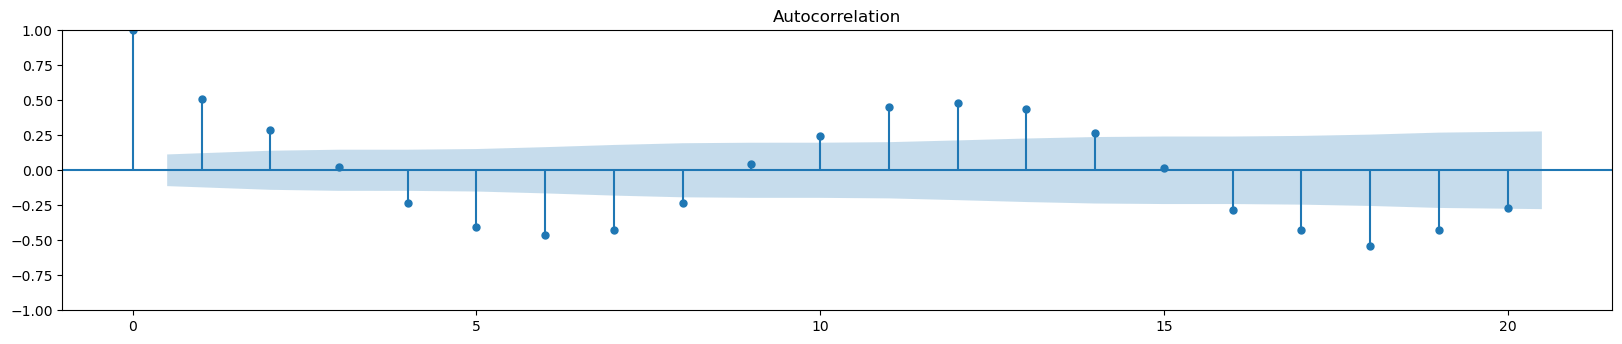

In [235]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_ip, lags=20, ax=ax1)

C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


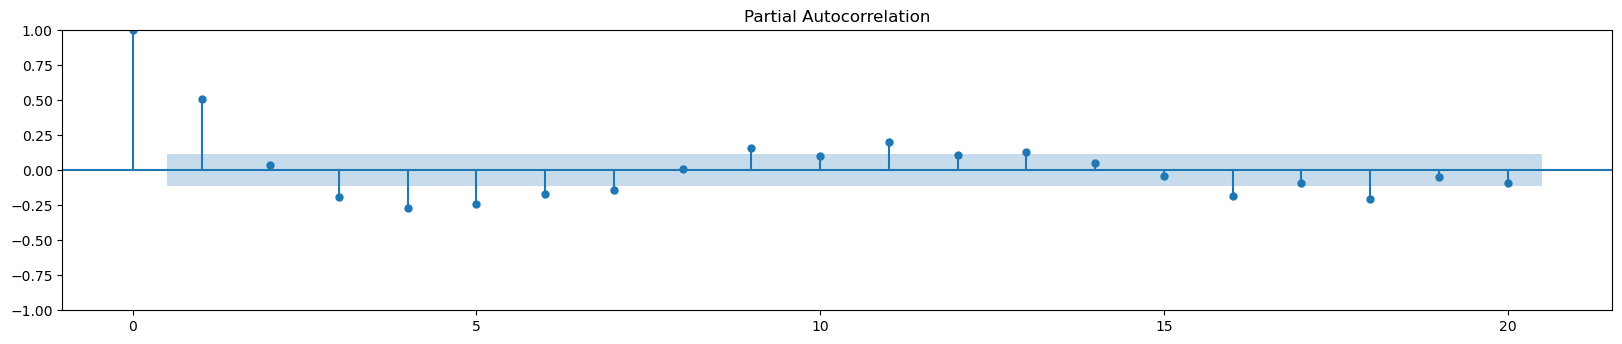

In [236]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(df_ip, lags=20, ax=ax1)

#### 2-4 분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안

## 통계
### 3. 기본 통계 및 확률 문제

#### 3-1 서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?

In [4]:
import numpy as np

a = [100, 80]
avg_speed = np.mean(a)
avg_speed

90.0

#### 3-2 이전의 연매출이 3000이고 올해의 연매출이 4000, 내년의 연매출이 5000으로 늘어날 예정이라면 연평균 몇배가 증가한 것인가?

In [13]:
sales = [3000, 4000, 5000]
incr1 = (sales[1] - sales[0]) /  sales[0]
incr2 = (sales[2] - sales[1]) /  sales[1]
avg = round((incr1 + incr2) / 2, 4)
print(f'{avg*100}%')

val = (sales[0] * (1+avg)) * (1+avg)
val

29.17%


5005.466670000001

#### 3-3 남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고, 남성 중에서 등산을 좋아할 확률을 구하시오

<img width="300" src="https://github.com/Ssunbell/Algorithm_Study/assets/97590480/98463d13-fa90-455b-a03c-a21701652dc1">

In [22]:
import pandas as pd

df = [[20, 10, 20+10], [15, 30, 15+30], [20+15, 10+30, 20+10+15+30]]
df = pd.DataFrame(df, index=["남자", "여자", "합계"], columns=["등산", "수영", "합계"])
df

,등산,수영,합계
남자,20,10,30
여자,15,30,45
합계,35,40,75


In [31]:
# P(등산 | 남성) = P(남성 | 등산) * P(등산) / P(남성)
p_mc = df.iloc[0,0] / df.iloc[2,0]
p_climb = df.iloc[2,0] / df.iloc[2,2]
p_male = df.iloc[0,2] / df.iloc[2,2]

result = p_mc * p_climb / p_male
result

0.6666666666666666

#### 3-4 표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정하라

In [53]:
from scipy import stats

n=10 
dof=n-1
sd_smap=90
conf_itvl= .95
alpha = round(1-conf_itvl,2)
alpha_lower = alpha/2
alpha_upper = conf_itvl + alpha/2
print(alpha_lower, alpha_upper)

0.025 0.975


In [54]:
# 모분산의 신뢰구간 dof * sd_samp / chi2_a/2 < sd_pop < dof * sd_samp / chi2_a/2

In [64]:
chi2_upper = stats.chi2.ppf(alpha_upper, dof)
chi2_lower = stats.chi2.ppf(alpha_lower, dof)

In [65]:
result_lower = (dof * sd_smap) / chi2_lower
result_upper = (dof * sd_smap) / chi2_upper
print(result_lower, result_upper)

299.95672846672363 42.58055444790953


### 4번 임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9  신뢰구간 95%이고 혈압약 투약 이전과 이후의 차이가 존재하는지 확인하려한다.

#### 4-1 귀무가설과 연구가설을 제시하시오
- H0: 투약 전과 후 차이가 없다
- H1: 투약 전과 후 차이가 존재한다
- shaprio p<.5: wilcox rank sum test
- shaprio p>.5: paried sample t-test 

In [99]:
# t_value =  Diff_samp / (sd_samp/sqrt(n))
dof = 20-1
t = 24 / (9 / np.sqrt(20))
t

11.925695879998878

In [83]:
# for example
t = 1.64
dof = 4

In [97]:
# 기각역: t값이 채택역 안에 있다
print(stats.t.ppf(0.025, dof)) # -t_0.025,4 의미
print(stats.t.ppf(0.975, dof)) # t_0.025,4 의미

-2.7764451051977996
2.7764451051977987


In [98]:
# p-value: 유의수준 (0.025) 보다 크므로 H0 수용 (차이가 없다)
print(2*(1 - stats.t.cdf(1.64, dof))) #p-value 의미

0.1763486621496122


#### 4-2 검정 후 귀무가설 기각 여부 제시

In [103]:
# p-value: 유의수준 (0.025) 보다 작으므로 H0 기각 (차이가 있다)
print(2*(1 - stats.t.cdf(t, dof))) #p-value 의미

2.8772539906185557e-10


### 5번 공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다.

In [105]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url3 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem5.csv'
encoded_url3 = urllib.parse.quote(url3, safe=':/')

response3 = urllib.request.urlopen(encoded_url3, context=context)
df3 = pd.read_csv(response3, encoding='utf-8')
df3

,출하 소요시간,공장,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1
5,64,Z,6
6,58,Y,2
7,71,Z,12
8,76,Y,14
9,67,Y,8


In [109]:
df3[" 공장"].value_counts()

X    15
Y    15
Z    14
Name:  공장, dtype: int64

In [111]:
df3.groupby(' 공장').median()

,출하 소요시간,공장별 출하 소요시간 순위
공장,,
X,64.0,8.0
Y,67.0,8.0
Z,66.5,7.5


#### 5-1. 연구가설과 귀무가설을 설정하시오
- H0: X, Y, Z 공장의 출하 소요시간의 중위수는 차이가 없다 (동일하다)
- H1: X, Y, Z 공장의 출하 소요시간의 중위수는 차이가 있다 (적어도 하나의 모집단의 중앙값은 다른 하나의 모집단의 중앙값과는 다르다)
- [reference](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=muzzincys&logNo=220083605883)
- Kruskal-Wallis H: non-parametric ANOVA

#### 5-2. 검정통계량을 구하고 가설을 채택하시오

In [127]:
X = list(df3.loc[df3[" 공장"] == "X", "출하 소요시간"])
Y = list(df3.loc[df3[" 공장"] == "Y", "출하 소요시간"])
Z = list(df3.loc[df3[" 공장"] == "Z", "출하 소요시간"])

In [129]:
#help(stats.kruskal)
stats.kruskal(X, Y, Z) # pvalue > 0.05 이므로 귀무가설 채택: 차이가 없다

KruskalResult(statistic=0.7217886080379153, pvalue=0.6970526702392181)

### 6번 다음은 A사의 투자 방안에 대한 표이다. 3년동안의 1~5안의 투자금액을 참고하여 1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고 NPV(순현재가치)가 가장 높아지는 안을 제시하시오.

<img width="300" src="https://github.com/Ssunbell/Algorithm_Study/assets/97590480/33f192c2-1103-4f88-ae36-f1ed0fbb9e18">

In [148]:
import numpy_financial
from numpy_financial import *
dir(numpy_financial)
help(numpy_financial.npv)

Help on function npv in module numpy_financial._financial:

npv(rate, values)
    Returns the NPV (Net Present Value) of a cash flow series.
    
    Parameters
    ----------
    rate : scalar
        The discount rate.
    values : array_like, shape(M, )
        The values of the time series of cash flows.  The (fixed) time
        interval between cash flow "events" must be the same as that for
        which `rate` is given (i.e., if `rate` is per year, then precisely
        a year is understood to elapse between each cash flow event).  By
        convention, investments or "deposits" are negative, income or
        "withdrawals" are positive; `values` must begin with the initial
        investment, thus `values[0]` will typically be negative.
    
    Returns
    -------
    out : float
        The NPV of the input cash flow series `values` at the discount
        `rate`.
    
    Warnings
    --------
    ``npv`` considers a series of cashflows starting in the present (t = 0).
  

In [150]:
df = [
    [10, 20, 15],
    [15, 14, 19],
    [12, 11, 30],
    [13, 25, 20],
    [16, 30, 24]
]

In [159]:
rate = .06
cashflow = [-50, 10]
numpy_financial.npv(rate, cashflow)

-40.56603773584906

In [160]:
for i in range(len(df)):
    cashflow = [-50, df[i][0]]
    print(numpy_financial.npv(rate, cashflow))

-40.56603773584906
-35.84905660377358
-38.67924528301887
-37.735849056603776
-34.905660377358494


In [161]:
for i in range(len(df)):
    cashflow = [-60, df[i][0], df[i][1]]
    print(numpy_financial.npv(rate, cashflow))

-32.76610893556426
-33.38910644357423
-38.889284442862234
-25.48593805624778
-18.2057671769313


In [162]:
for i in range(len(df)):
    cashflow = [-70, df[i][0], df[i][1], df[i][2]]
    print(numpy_financial.npv(rate, cashflow))

-30.171819690079737
-27.436340065960493
-23.70070595189318
-18.69355239560174
-8.054904384156057
